In [1]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram

In [14]:
def dj_oracle(n, case):
    
    qc = QuantumCircuit(n+1)
    
    if case == "balanced":
        for qubit in range(n):
            qc.cx(qubit, n)
            
    if case == "constant":
        rand = np.random.randint(2)
        if rand == 1: # fixed output of 1
            qc.x(n)
    
    return qc

In [15]:
def dj_algorithm(n, case = 'random'):
    qc = QuantumCircuit(n+1, n)
    
    for qubit in range(n):
        qc.h(qubit)
    
    qc.x(n)
    qc.h(n)
    
    if case == 'random':
        rand = np.random.randint(2)
        if rand == 1:
            case = 'balanced'
        else:
            case = 'constant'
            
    oracle = dj_oracle(n, case)
    oracle = oracle.to_gate()
    oracle.name = "Oracle"
    
    qc.append(oracle, range(n+1))
    
    for qubit in range(n):
        qc.h(qubit)
        qc.measure(qubit, qubit)
        
    return qc   

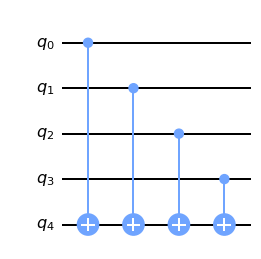

In [16]:
n = 4
qc = dj_oracle(n, 'balanced')
qc.draw(output='mpl')

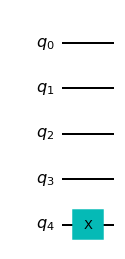

In [25]:
n = 4
qc = dj_oracle(n, 'constant')
qc.draw(output='mpl')

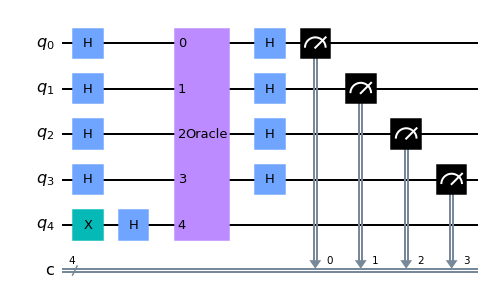

In [18]:
n = 4
qc = dj_algorithm(n)
qc.draw(output='mpl')

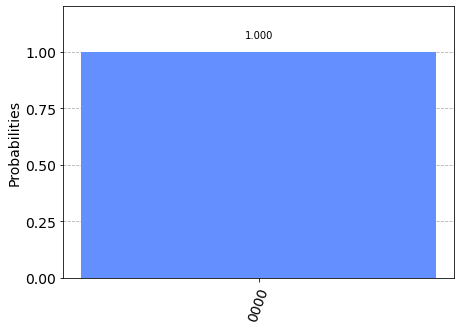

In [19]:
qc = dj_algorithm(n, 'constant')

sim = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = sim, shots = 1).result()
counts = result.get_counts()
plot_histogram(counts)

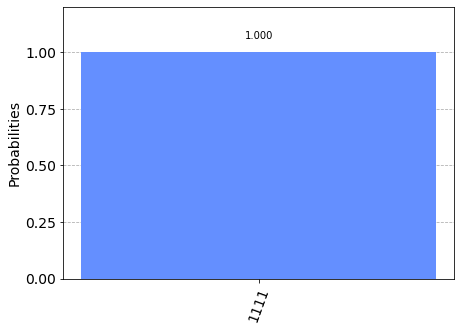

In [20]:
qc = dj_algorithm(n, 'balanced')

sim = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = sim, shots = 1).result()
counts = result.get_counts()
plot_histogram(counts)